In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import scipy.stats as stats

In [4]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.shape

(768, 9)

In [ ]:
# This is the size of the dataset. There are 9 variables and 768 different measurements (data points).  These data points 
# represent different participants so there is 768 in this dataset.

In [5]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
# I did this to see the variables in the experiment.  In the outcome column, 1 indicates that the participant has diabetes and
# 0 means they do not have diabetes.  We are looking at the number of pregnancies the participant, their glucose level in mg/dL
#, their blood pressure in mm Hg, the thickness of a participants skin at the triceps in mm, the insulin level in uU/ml, their
# body mass index in kg/m^2, their age in years, the diabetes pedigree which is a value that indicates diabetes history in your
# relatives based on genetics, and the outcome described earlier.

In [6]:
df["Age"].mean()

33.240885416666664

In [ ]:
# The mean age of the sample is 33.24 years old. 

In [7]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# From the distribution of the outcome it is found that 500 participants do not have diatbetes and 268 do have diabetes.

<function matplotlib.pyplot.show(close=None, block=None)>

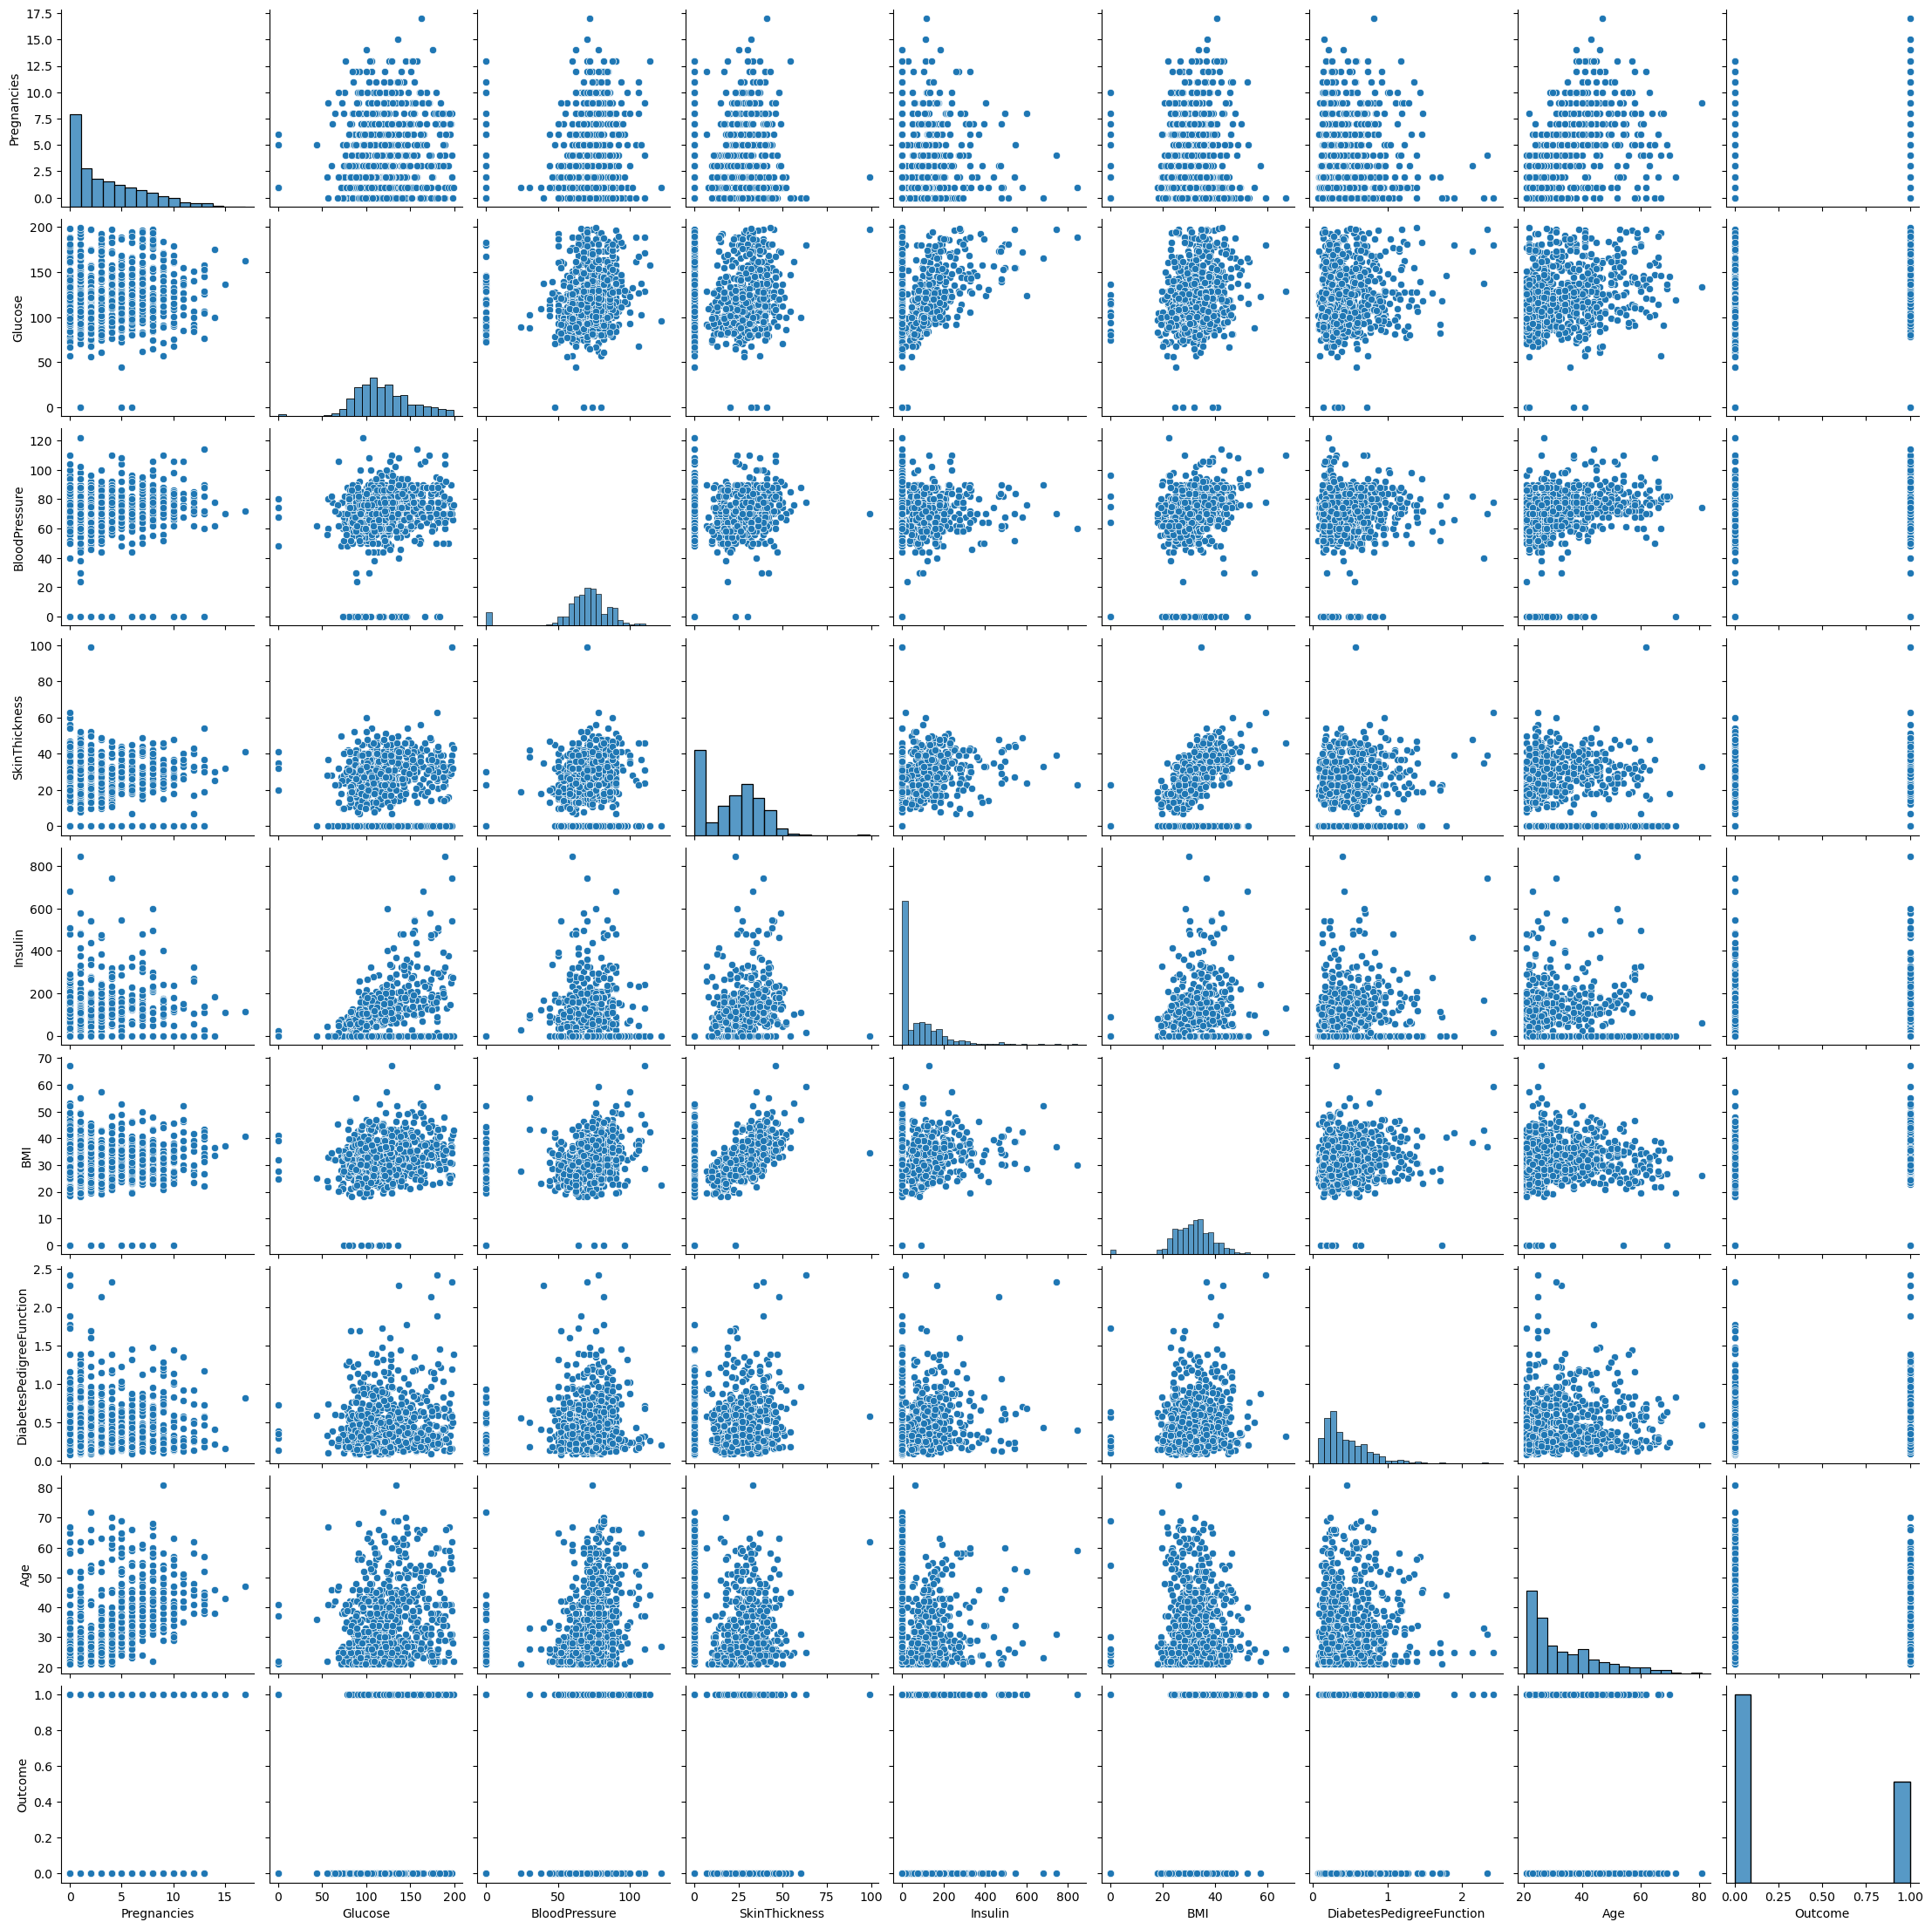

In [8]:
sns.pairplot(df)
plt.show

In [ ]:
# The histogram for glucose has some 0 values which is concerning because a persons glucose level should never be 0.  The overall
# shape of the distribution is right or positive skewed. The histogram for blood pressure also has a lot of 0 values which does
# not make sense and is not positive.  There is also a left or neagtive skewed distribution in the data.  The skin thickness
# has the same issue as the others with values of 0 (a lot more than the others) along with the insulin values of the patients.
# There are also a lot of patients in the insulin category that have large values around 800 when the majority of the values 
# are around 150 uU/mL.  The BMI also has some instances of 0 but it is the most normally distributed (looks wise) than the 
# others. 

In [11]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
# There are no null or NA values in our data set.  Each variable has reported False.

In [5]:
df["Glucose"] = df["Glucose"].replace(0, np.NaN)
df["BloodPressure"] = df["BloodPressure"].replace(0, np.NaN)
df["SkinThickness"] = df["SkinThickness"].replace(0, np.NaN)
df["Insulin"] = df["Insulin"].replace(0, np.NaN)
df["BMI"] = df["BMI"].replace(0, np.NaN)

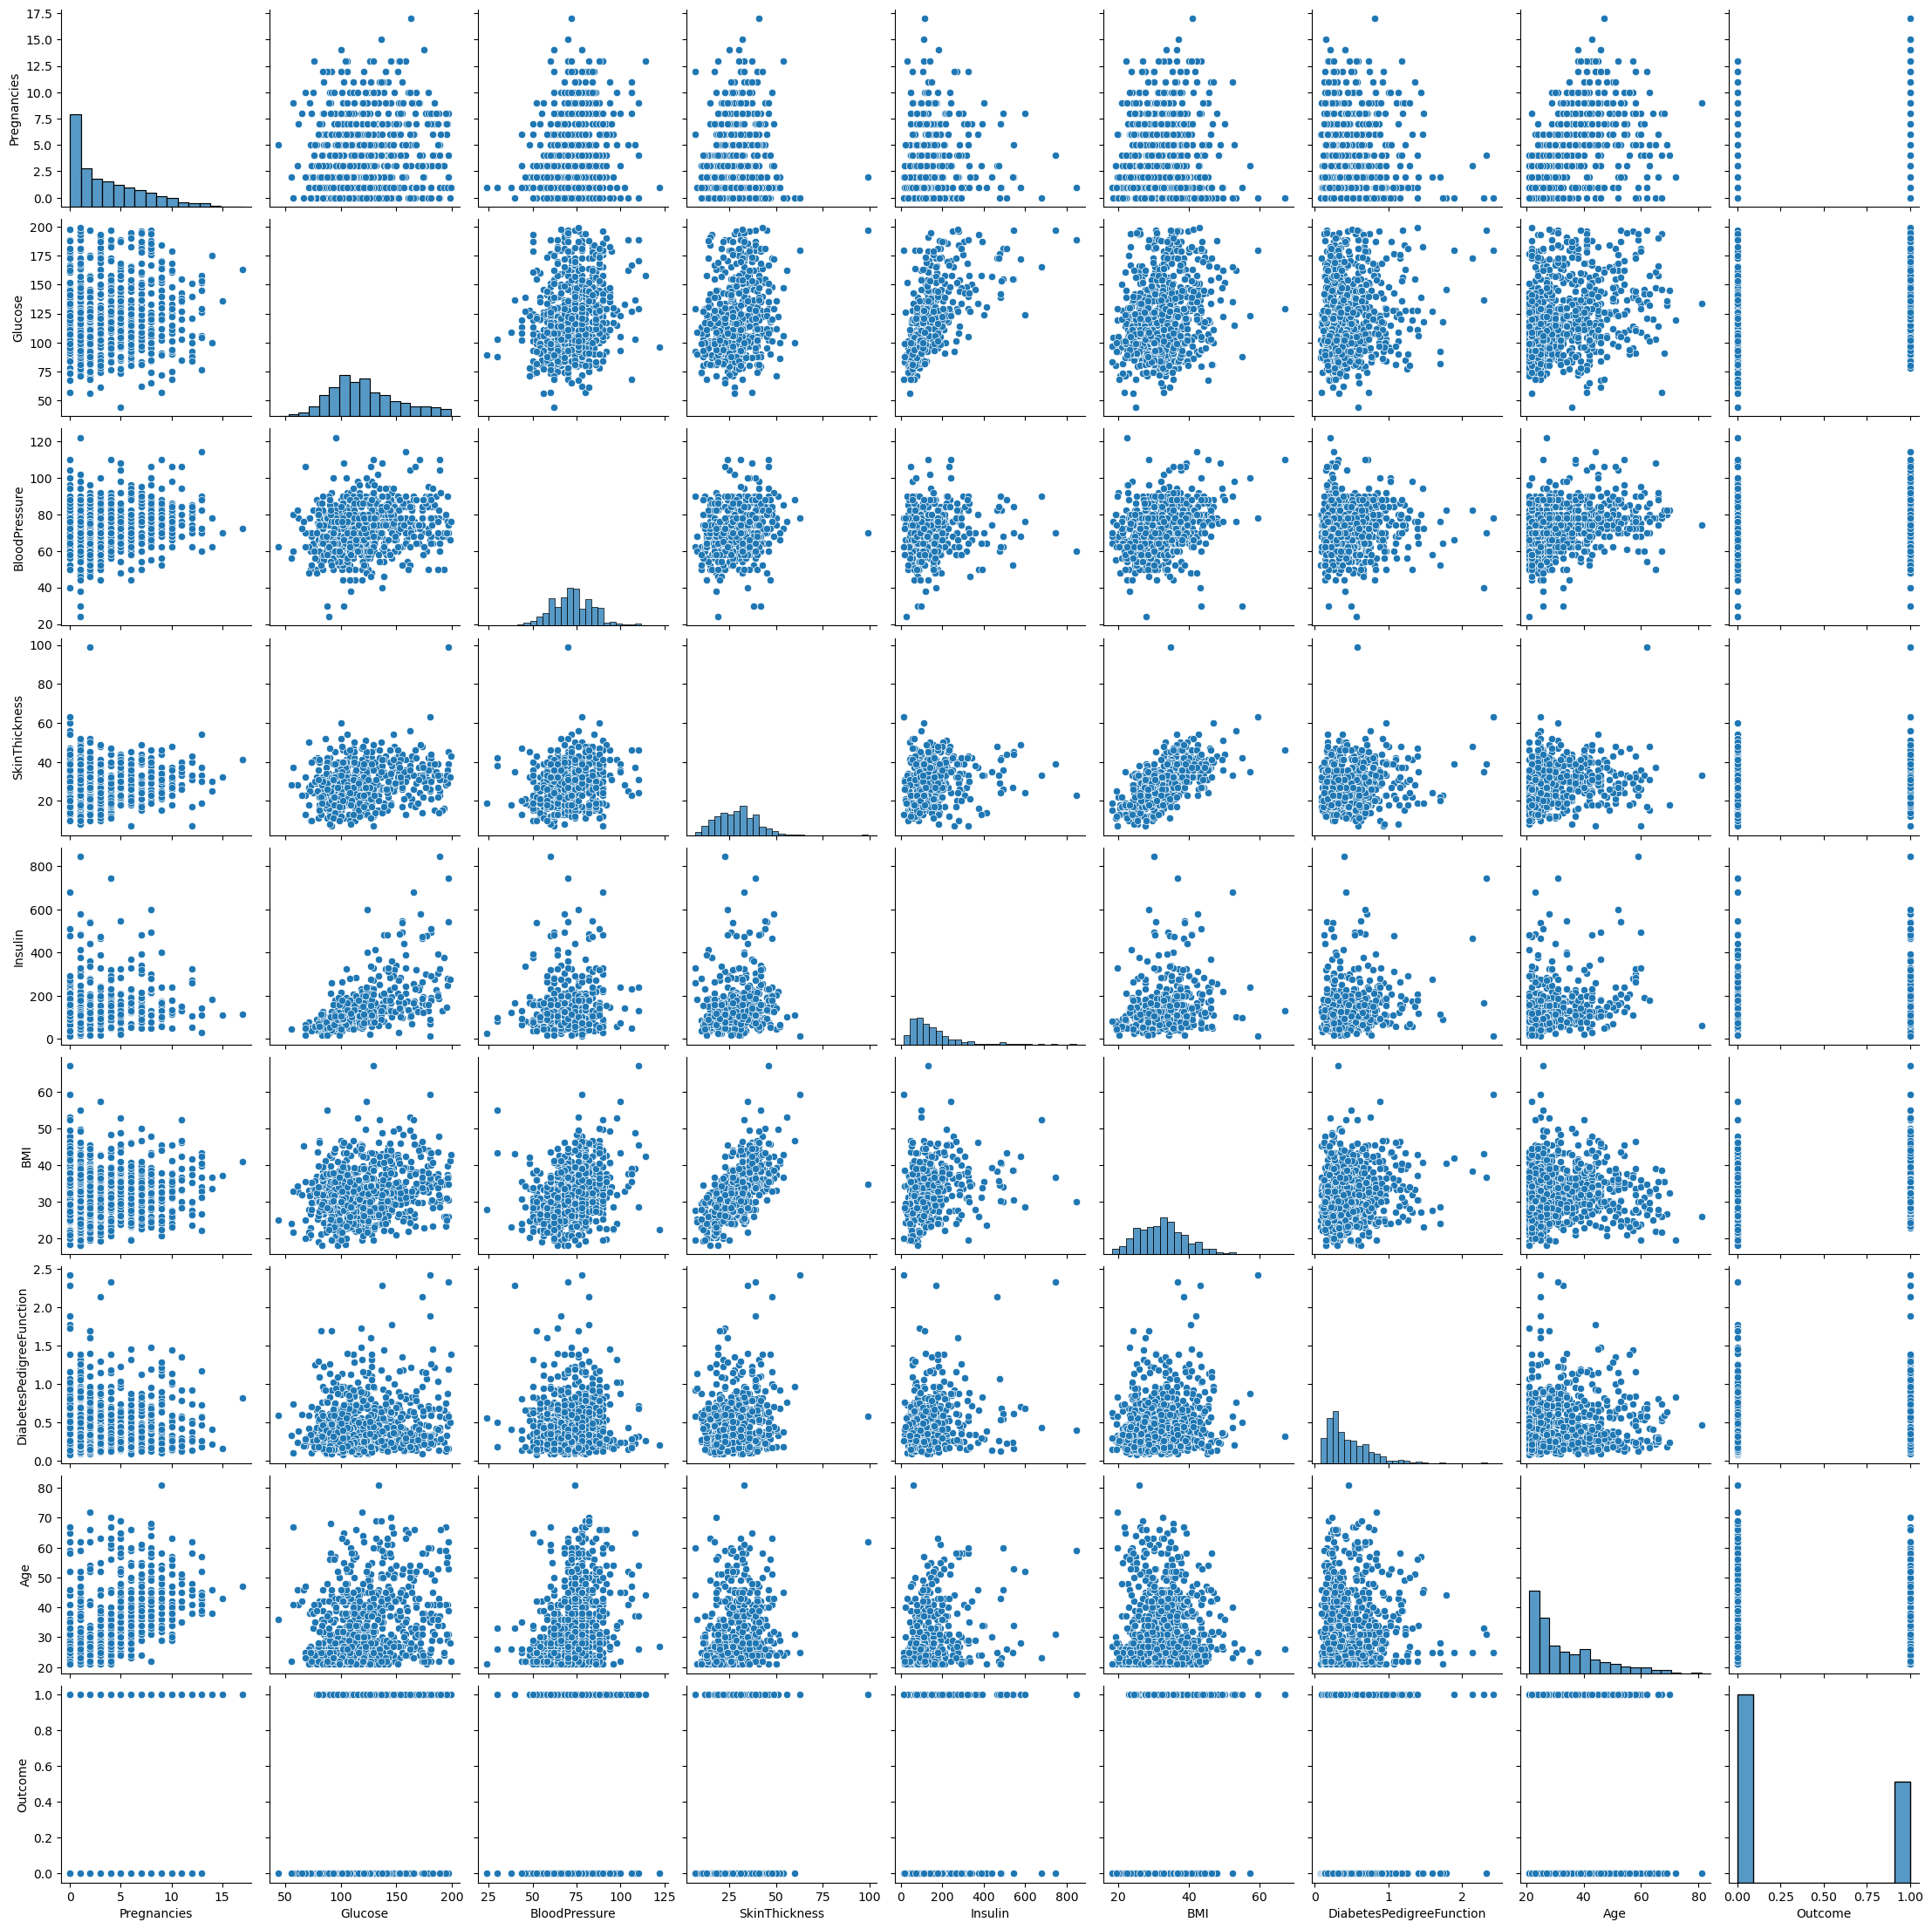

In [37]:
sns.pairplot(df)


In [ ]:
# This line of code took all of the 0 values and replaced them with an NA value.  This was only conducted on the Glucose, 
# Blood Pressure, Skin Thickness, Insulin, and BMI variables.  These are the same variables that we pointed out should not 
# be zero from the histograms above. 

In [13]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
# This line of code counted how many times the 0 values in these variables were made into NA values.  It is telling us the number 
# of times that it happened for each of the variables.  In the experiement it was said that they reported 0 for the patients 
# that they did not know the true values for.  This happened the most with the insulin (227) and skin thickness (374) of the 
# patients.

In [6]:
df['Glucose'].fillna(df['Glucose'].median(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)

In [ ]:
# This line of code is taking all of the NA values from the glucose, blood pressure, skin thickness, insulin, and BMI levels and
# replaces them with the median values of the datapoints.  This allows us to have values for all of the datapoints.  The three
# lines of code together took out all of the missing information 0's that were filled in for the unknown values and replaced 
# them with the median values of all of the other measured datapoints. 

# I think this is the most valid way to replace the values.  Obviously, it would be more ideal to have their actual measurements
# as these variables are key to understanding if they have an effect on diabetes or not.  Median is better than mean in these 
# cases because the mean is more effected by the outliers of the data sets.

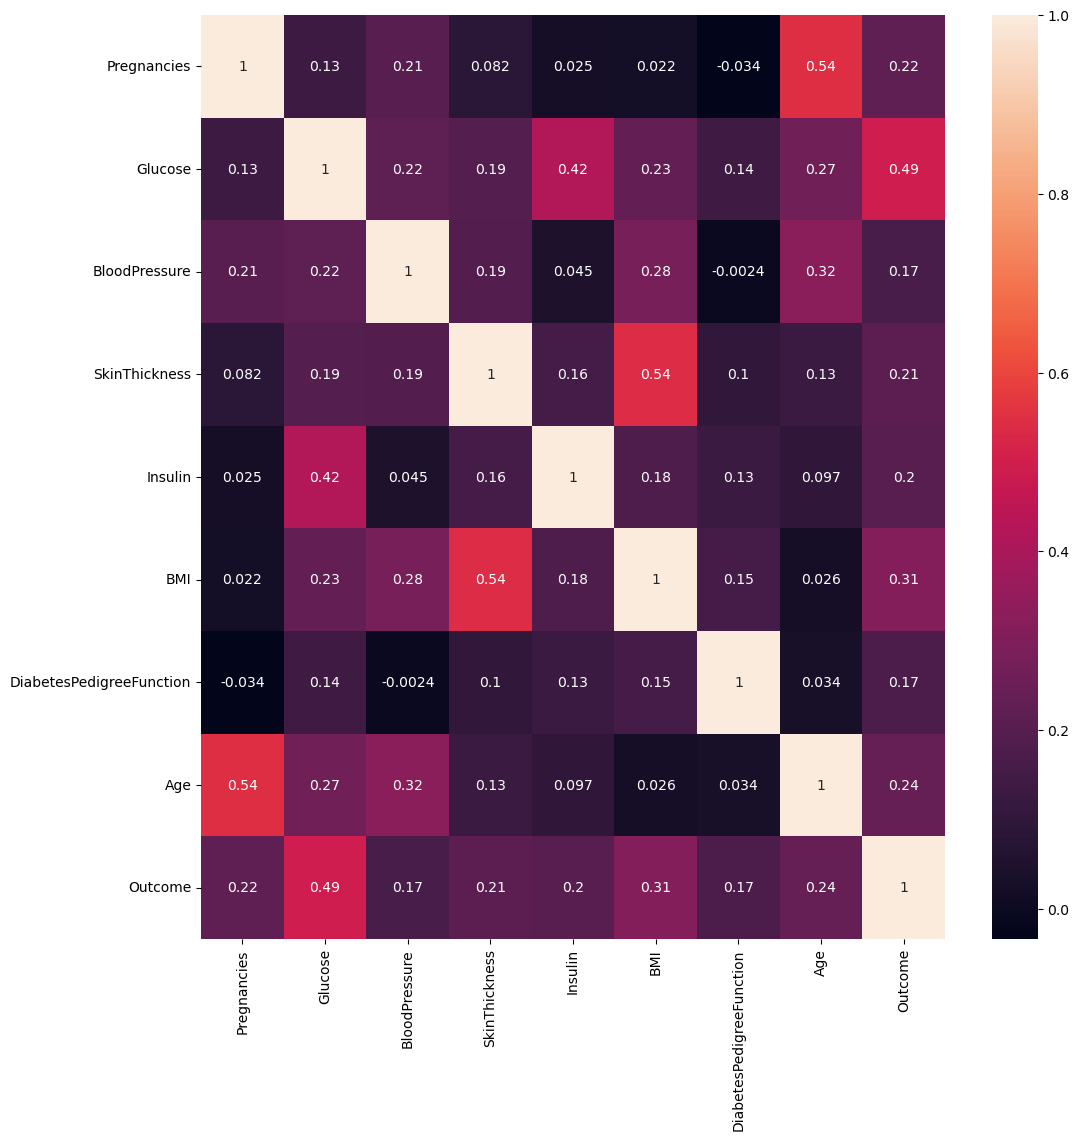

In [39]:
plt.figure(figsize = (12,12))
sns.heatmap(data = df.corr(),annot = True)
plt.show()

In [ ]:
# The two features that have the strongest correlation are a tie between age and pregnancies, and, skin thickness and BMI. 
# They both have a correlation of 0.54 which is not a very strong correlation but it is the best one that we have.  This 
# tells me that either our way of filling in the data really meassed up the relationships or there is little correlation between
# any of these variables with each other and diabetes.  The feature with the strongest correlation with the outcome is the
# glucose level.

In [7]:
df2 = df[df["Outcome"]==0]
df2
# This seperates out those that do not have diabetes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1              1     85.0           66.0           29.0    125.0  26.6   
3              1     89.0           66.0           23.0     94.0  28.1   
5              5    116.0           74.0           29.0    125.0  25.6   
7             10    115.0           72.0           29.0    125.0  35.3   
10             4    110.0           92.0           29.0    125.0  37.6   
..           ...      ...            ...            ...      ...   ...   
762            9     89.0           62.0           29.0    125.0  22.5   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
1                       0.351   31        0  
3                       0.167   21        0  
5                       0.201   30        0  
7                       0.134   29        0  
10                      0.191   30        0  
..                        ...  ...      ...  
762                     0.142   33        0  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
767                     0.315   23        0  

[500 rows x 9 columns]

In [44]:
df2["BloodPressure"].mean()

70.92

In [ ]:
# The mean blood pressure of those that do not have diabetes is 70.92 mm Hg.

In [8]:
df3 = df[df["Outcome"]== 1]
df3

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
2              8    183.0           64.0           29.0    125.0  23.3   
4              0    137.0           40.0           35.0    168.0  43.1   
6              3     78.0           50.0           32.0     88.0  31.0   
8              2    197.0           70.0           45.0    543.0  30.5   
..           ...      ...            ...            ...      ...   ...   
755            1    128.0           88.0           39.0    110.0  36.5   
757            0    123.0           72.0           29.0    125.0  36.3   
759            6    190.0           92.0           29.0    125.0  35.5   
761            9    170.0           74.0           31.0    125.0  44.0   
766            1    126.0           60.0           29.0    125.0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
2                       0.672   32        1  
4                       2.288   33        1  
6                       0.248   26        1  
8                       0.158   53        1  
..                        ...  ...      ...  
755                     1.057   37        1  
757                     0.258   52        1  
759                     0.278   66        1  
761                     0.403   43        1  
766                     0.349   47        1  

[268 rows x 9 columns]

In [46]:
df3["BloodPressure"].mean()

75.1231343283582

In [ ]:
# The mean blood pressure of those that have diabetes is 75.12 mm Hg.  There was a difference of 4.2 mm Hg.

In [47]:
df.groupby("Outcome").mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  110.682000      70.920000      27.726000  127.792000   
1           4.865672  142.130597      75.123134      31.686567  164.701493   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.885600                  0.429734  31.190000  
1        35.383582                  0.550500  37.067164

In [ ]:
# When comparing the mean values of each of these variables those with diabetes have more pregnancies, a higher glucose level,
# have a higer blood pressure, thicker skin, a higher insulin level, have a higher BMI, have a higher diabetes pedigree value,
# and are older.  The biggest difference is found in glucose levels and insulin.  

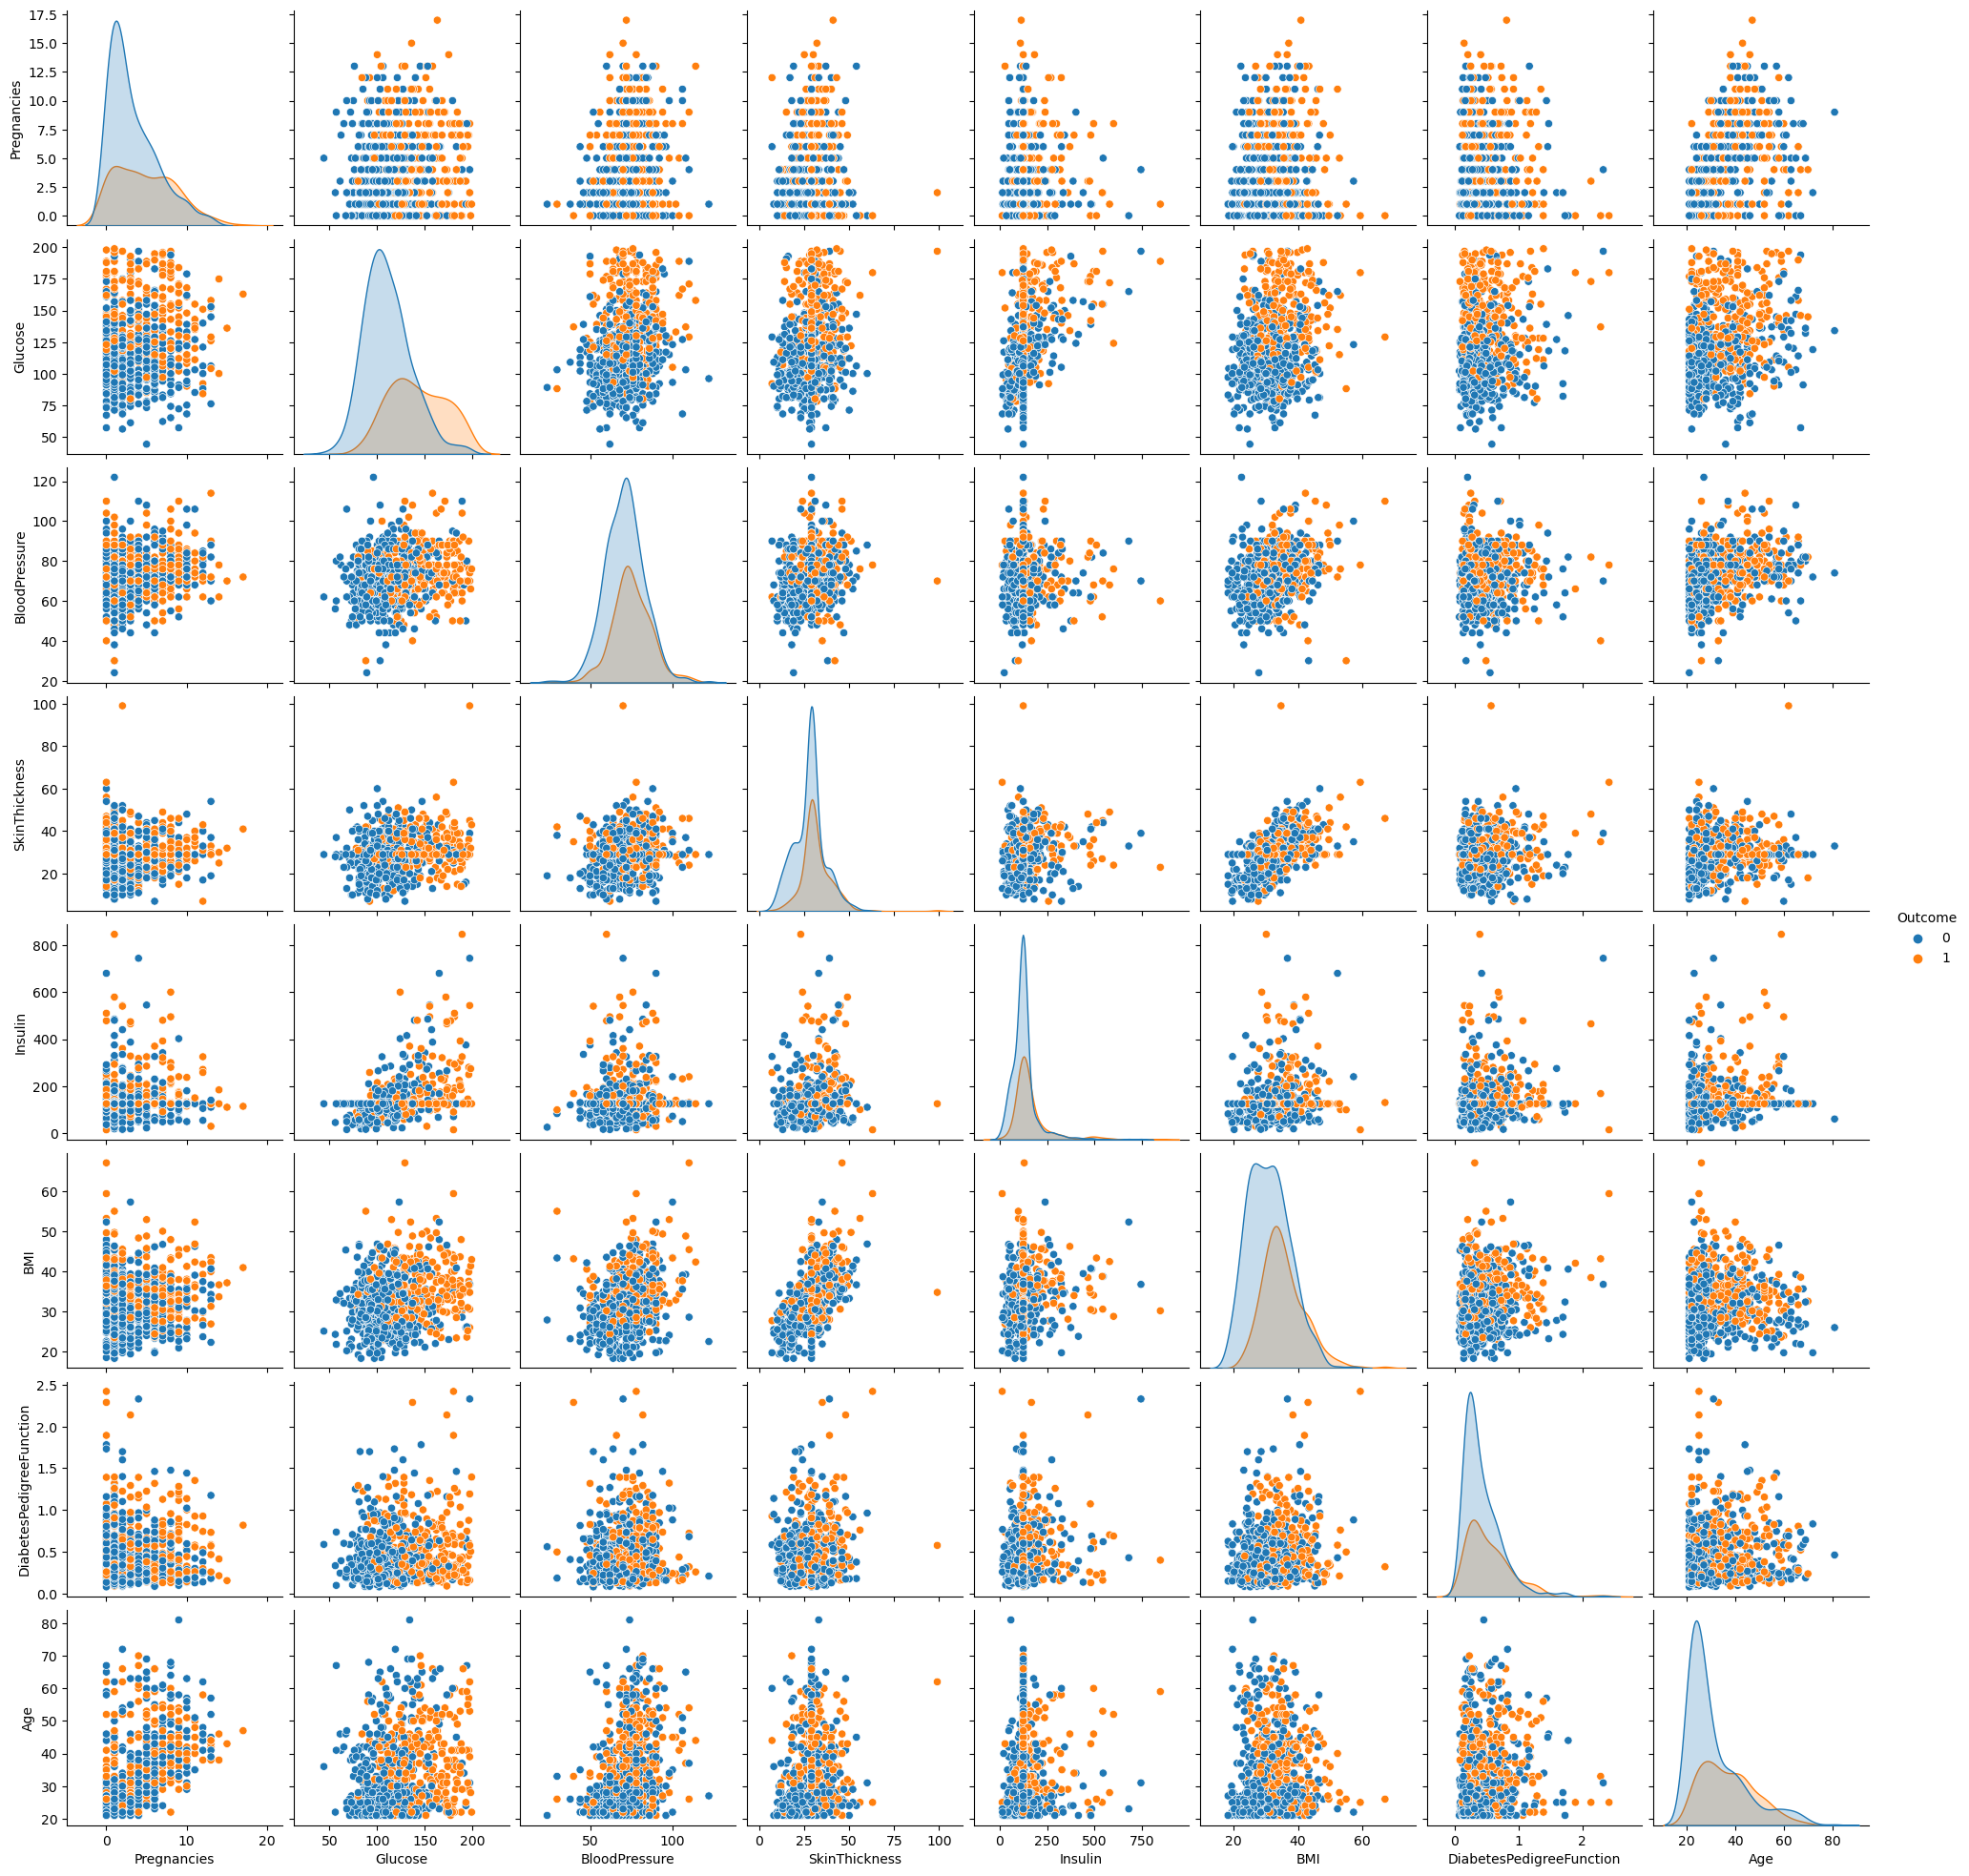

In [49]:
sns.pairplot(df,hue ="Outcome")

In [ ]:
# In these plots the blue is those that do not have diabetes.  The orange is those that have diabetes.  When looking at the 
# different plots it looks like those that did not have diabetes are all more tightly packed and within a smaller range while 
# those with diabetes are more spread out and are over a large range.

((array([-3.12069362e+00, -2.84945435e+00, -2.69768447e+00, -2.59044160e+00,
         -2.50664754e+00, -2.43745274e+00, -2.37827016e+00, -2.32640403e+00,
         -2.28013073e+00, -2.23827901e+00, -2.20001550e+00, -2.16472534e+00,
         -2.13194152e+00, -2.10130063e+00, -2.07251420e+00, -2.04534920e+00,
         -2.01961466e+00, -1.99515202e+00, -1.97182811e+00, -1.94953002e+00,
         -1.92816110e+00, -1.90763799e+00, -1.88788828e+00, -1.86884861e+00,
         -1.85046325e+00, -1.83268292e+00, -1.81546377e+00, -1.79876666e+00,
         -1.78255649e+00, -1.76680162e+00, -1.75147347e+00, -1.73654612e+00,
         -1.72199598e+00, -1.70780152e+00, -1.69394305e+00, -1.68040247e+00,
         -1.66716316e+00, -1.65420979e+00, -1.64152817e+00, -1.62910519e+00,
         -1.61692865e+00, -1.60498724e+00, -1.59327041e+00, -1.58176831e+00,
         -1.57047175e+00, -1.55937212e+00, -1.54846135e+00, -1.53773186e+00,
         -1.52717653e+00, -1.51678867e+00, -1.50656194e+00, -1.49649040e+00,

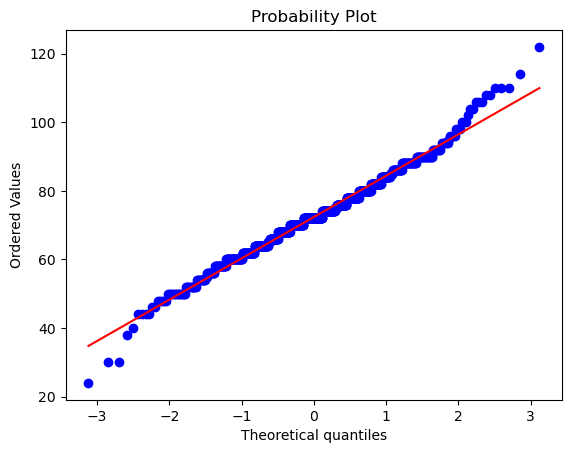

In [53]:
stats.probplot(df["BloodPressure"], plot = plt)

In [ ]:
# It appears that the blood presssure is not normally distributed due to the amount of dots that are off and are a good distance 
# away from the red line of best fit.  It misses above and below the lines.  

In [63]:
# H0: Blood Pressure for those with diabetes comes from a normal distribution
# H1: Blood Pressure for those with diabetes does not come from a normal distribution
# alpha = 0.01

stats.normaltest(df3['BloodPressure'])

NormaltestResult(statistic=9.543706428855074, pvalue=0.00846467875062274)

In [ ]:
# The p-value for this normal test was 0.0085.  This p-value is smaller than the alpha value so we reject the null
# hypothesis.  This means that the blood pressure is not normally distributed.  

In [64]:
# H0: Blood Pressure for those without diabetes comes from a normal distribution
# H1: Blood Pressure for those without diabetes does not come from a normal distribution
# alpha = 0.01

stats.normaltest(df2['BloodPressure'])

NormaltestResult(statistic=15.27816141660918, pvalue=0.00048127067689694204)

In [ ]:
# The p-value for this normal test was 0.00048.  This p-value is smaller than the alpha value so we reject the null
# hypothesis.  This means that the blood pressure is not normally distributed.  

In [65]:
np.percentile(df3["BloodPressure"], [.5,99.5]) 

array([ 42.68, 110.  ])

In [ ]:
# This is the 99th confidence interval for those with diabetes blood pressure meaning that there is a 99% chance that the true population mean 
# would fall inbetween these values.  This is the 99th confidence interval because it is taking off 0.5% of the data from the front
# which is why I used .5 and .5% of the data off the back which is why I used 99.5.  These are percentile values.

In [66]:
np.percentile(df3["BloodPressure"], [2.5,97.5])

array([ 50.  , 102.65])

In [ ]:
# This is the 95th confidence interval for those with diabetes blood pressure meaning that there is a 95% chance that the true population mean 
# would fall inbetween these values.  This is the 95th confidence interval because it is taking off 2.5% of the data from the front
# which is why I used 2.5 and 2.5% of the data off the back which is why I used 97.5.  These are percentile values.

In [67]:
df3["BloodPressure"].mean()

75.1231343283582

In [ ]:
# The mean blood pressure for those with diabetes (75.12) is within the range of values for both the 99th and 95th 
# confidence intervals.

In [68]:
np.percentile(df2["BloodPressure"], [.5,99.5]) 

array([ 40.97, 107.01])

In [ ]:
# This is the 99th confidence interval for those without diabetes blood pressure meaning that there is a 99% chance that 
# the true population mean would fall inbetween these values.  This is the 99th confidence interval because it is taking off 
# 0.5% of the data from the front which is why I used .5 and .5% of the data off the back which is why I used 99.5.  
# These are percentile values.

In [70]:
np.percentile(df2["BloodPressure"], [2.5,97.5])

array([48.95, 94.  ])

In [ ]:
# This is the 95th confidence interval for those without diabetes blood pressure meaning that there is a 95% chance that the true population mean 
# would fall inbetween these values.  This is the 95th confidence interval because it is taking off 2.5% of the data from the front
# which is why I used 2.5 and 2.5% of the data off the back which is why I used 97.5.  These are percentile values.

In [71]:
df2["BloodPressure"].mean()

70.92

In [ ]:
# The mean blood pressure for those without diabetes (70.92) is within the range of values for both the 99th and 95th 
# confidence intervals

In [72]:
# H0: The mean blood pressure of those without diabetes is the same as the whole population
# H1: The mean blood pressure of those without diabetes is not the same as the whole population 
# alpha = 0.01

stats.ttest_1samp(df2["BloodPressure"], 71)

Ttest_1sampResult(statistic=-0.1499536162128066, pvalue=0.8808618001852418)

In [ ]:
# The p-value for those without diabetes is 0.88 which is larger than alpha so we accept H0 that the blood pressure is 
# the same as the whole population.

In [73]:
# H0: The mean blood pressure of those with diabetes is the same as the whole population
# H1: The mean blood pressure of those with diabetes is not the same as the whole population 
# alpha = 0.01

stats.ttest_1samp(df3["BloodPressure"], 71)

Ttest_1sampResult(statistic=5.647629811136108, pvalue=4.158548511042713e-08)

In [ ]:
# The p-value for those with diabetes is lower than alpha so we would reject H0 and say that blood pressure is not the same
# as the whole population.

In [10]:
# H0: the mean blood pressure of those with diabetes is the same as those without diabetes
# H1: the mean blood pressure of those with diabetes is not the same as those without diabetes
# alpha is 0.01
stats.ttest_ind(df2["BloodPressure"],df3["BloodPressure"])

Ttest_indResult(statistic=-4.65097622072597, pvalue=3.8908354906479115e-06)

In [ ]:
# The p-value is very small (3.89e-06) which is smaller our alpha value (0.01) so we
# reject the null hypothesis (H0) and can accept H1 which means that the mean blood pressure
# of those with diabetes is not the same as those without diabetes.  They are statistically different.

In [11]:
# H0: The mean glucose of those without diabetes is the same as the whole population
# H1: The mean glucose of those without diabetes is not the same as the whole population 
# alpha = 0.01

stats.ttest_1samp(df2["Glucose"], 110)

Ttest_1sampResult(statistic=0.617228304327748, pvalue=0.5373656835106906)

In [ ]:
# The p-value is 0.537 which is larger than alpha (0.01) which means that we can accept H0.
# This means that the mean glucose of those without diabetes is the same as the whole population.

In [12]:
# H0: The mean glucose of those with diabetes is the same as the whole population
# H1: The mean glucose of those with diabetes is not the same as the whole population 
# alpha = 0.01

stats.ttest_1samp(df3["Glucose"], 110)

Ttest_1sampResult(statistic=17.789016013683774, pvalue=3.145088204392815e-47)

In [ ]:
# The p-value is 3.14e-47 which is smaller than aploha (0.01) which means that we can reject H0.
# This means that the mean glucose of those with diabetes is not the same as the whole population.

In [13]:
# H0: the mean glucose of those with diabetes is the same as those without diabetes
# H1: the mean glucose of those with diabetes is not the same as those without diabetes
# alpha is 0.01
stats.ttest_ind(df2["Glucose"],df3["Glucose"])

Ttest_indResult(statistic=-15.673795182294105, pvalue=3.1287190418423694e-48)

In [ ]:
# The p-value is 3.12e-48 which is smaller than alpha (0.01) which means that we reject H0.
# This means that the mean glucose of those with diabetes is not the same as those without
# diabetes. 

In [14]:
# H0: the mean insulin level of those with diabetes is the same as those without diabetes
# H1: the mean insulin level of those with diabetes is not the same as those without diabetes
# alpha is 0.01
stats.ttest_ind(df2["Insulin"],df3["Insulin"])

Ttest_indResult(statistic=-5.76114539252401, pvalue=1.210025703412445e-08)

In [ ]:
# The p-value is 1.21e-08 which is smaller than alpha (0.01) which means that we reject H0.
# This means that the mean insulin level of those with diabetes is not the same as those without
# diabetes.

In [ ]:
# The mean age of those involved in this study is 33.24 years old.  It looks at different features of participants including the
# number of times that they have been pregnant, their glucose levels, their blood pressure, their skin thickness, their insulin level
# their BMI, thier diabetes pedigree function (value that indicates diabetes history in your relatives), their age, and if they have diabetes
# or not.  There are 500 participants that do not have diabetes and 268 particiapnts with diabetes.  When looking at the distributions of the
# data it is seen that there are a lot of data points that are 0.  This is not possible for a lot of variables (glucose, blood pressure
# skin thickness, insulin, and BMI levels).  These 0 values were taken when the real levels were not recorded.  In order to fix this 
# we replaced all of the 0 values with the median value of all the data points that were taken.  This can create some discrepancies 
# in our data.  This created a lot of small values in correlation with the largest being age and pregnancies, skin thickness and 
# BMI with a correlation of 0.54.  I think to get more accurate results and possibly stronger correlation values they should go back
# and get the real values.  The next thing that we looked at is slitting up those with diabetes and those without diabetes and running
# a lot of t tests on different varaibles.  The mean blood pressure of those without diabetes is 70.92 mm Hg and those with diabetes is 
# 75.12 mm Hg.  There were a few conclusions that we gathered from the t-tests.  The blood pressure of those with diabetes is not 
# normally distributed.  The blood pressure of those without diabetes is not normally distributed.  The blood pressure of those without diabetes is the same as
# the whole population.  The blood pressure of those with diabetes is not the same as teh whole population.  The mean blood pressure
# of those with diabetes is not the same as those without diabetes, they are statistically different.  The mean glucose of those without
# diabetes is the same as the whole population.  The mean glucose of those with diabetes is not the same as the whole population.
# The mean glucose of those with diabetes is not the same as those without diabetes. And finally, the mean insulin level of those
# with diabetes is not the same as those without diabetes. 